In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=False,
                         crane_type_defaults=container_defaults.sts_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()

PV: [-3.55335840e+07 -4.91082777e+07  9.18352124e+07  9.28107016e+07
  9.36696440e+07  6.67564103e+07  1.54916171e+08  2.68705147e+08
  2.89994009e+08  2.91189476e+08]
NPV: 1265234909.2155914


## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year  volume
0  2020  200000
1  2021  200000
2  2022  200000
3  2023  200000
4  2024  200000
5  2025  200000
6  2026  600000
7  2027  600000
8  2028  600000
9  2029  600000, 'handling_fee': 500, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': '04de008c-6690-11e9-88d3-7c76353a4af7'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '04df601c-6690-11e9-a58e-7c76353a4af7'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': '04df872e-6690-11e9-bce2-7c76353a4af7'}

Panamax_1

{'type': 'Panamax', 'call_size': 3000, 'LOA': 290, 'draft': 13, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 

{'land_use': 36832.32, 'triggers': [], 'capex': 9258080, 'labour': [], 'maintenance': 920808, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'mobilisation': 50000, 'maintenance_perc': 0.1, 'width': 48, 'height': 4, 'length': 20, 'capacity': 3840, 'gross_tgs': 26.46, 'area_factor': 1.45, 'pavement': 200, 'drainage': 50, 'household': 0.1, 'digout_margin': 1.2, 'year_purchase': [], 'year_online': 2022, 'name': 'SC Stack', 'id': '050c9a41-6690-11e9-a8a2-7c76353a4af7', 'df':    year      capex  maintenance
0  2020        0.0          0.0
1  2021  9258080.0          0.0
2  2022        0.0     920808.0
3  2023        0.0     920808.0
4  2024        0.0     920808.0
5  2025        0.0     920808.0
6  2026        0.0     920808.0
7  2027        0.0     920808.0
8  2028        0.0     920808.0
9  2029        0.0     920808.0}

Empty Stack

{'land_use': 2937.6, 'triggers': [], 'capex': 


Tractor-trailer

{'triggers': [], 'labour': 150000, 'maintenance': 8500.0, 'energy': [], 'insurance': 850.0, 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'non_essential_moves': 1.2, 'year_purchase': [], 'year_online': 2026, 'name': 'Tractor-trailer', 'id': '0540f87e-6690-11e9-9e01-7c76353a4af7', 'shift': 5, 'df':    year    capex  maintenance  insurance    labour       fuel
0  2020      0.0          0.0        0.0       0.0        0.0
1  2021      0.0          0.0        0.0       0.0        0.0
2  2022      0.0          0.0        0.0       0.0        0.0
3  2023      0.0          0.0        0.0       0.0        0.0
4  2024      0.0          0.0        0.0       0.0  

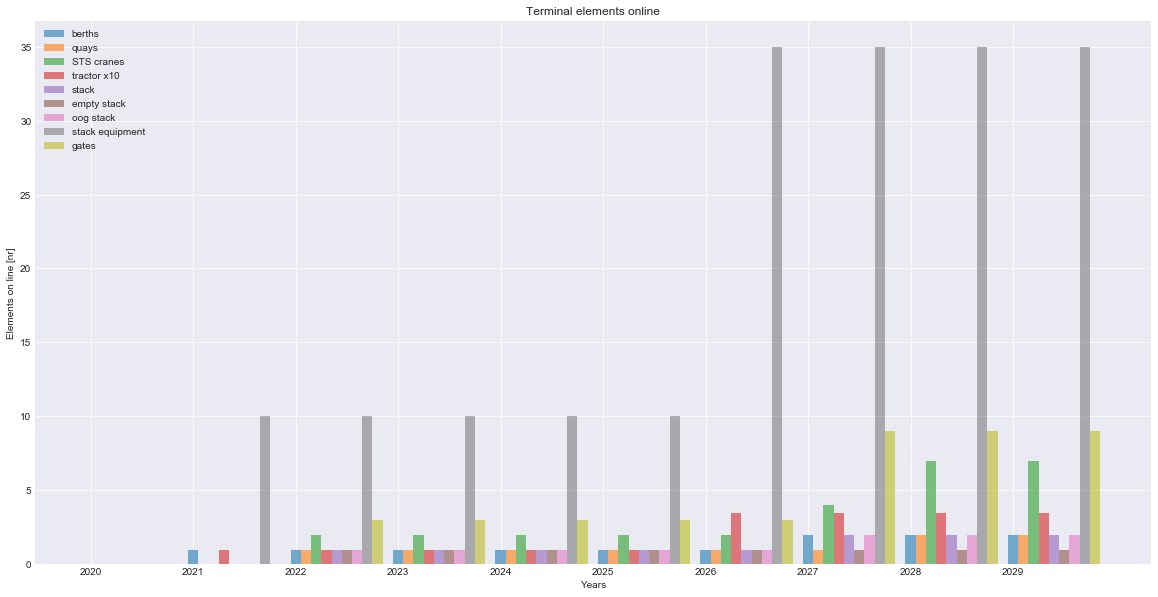

In [8]:
Terminal.terminal_elements_plot()

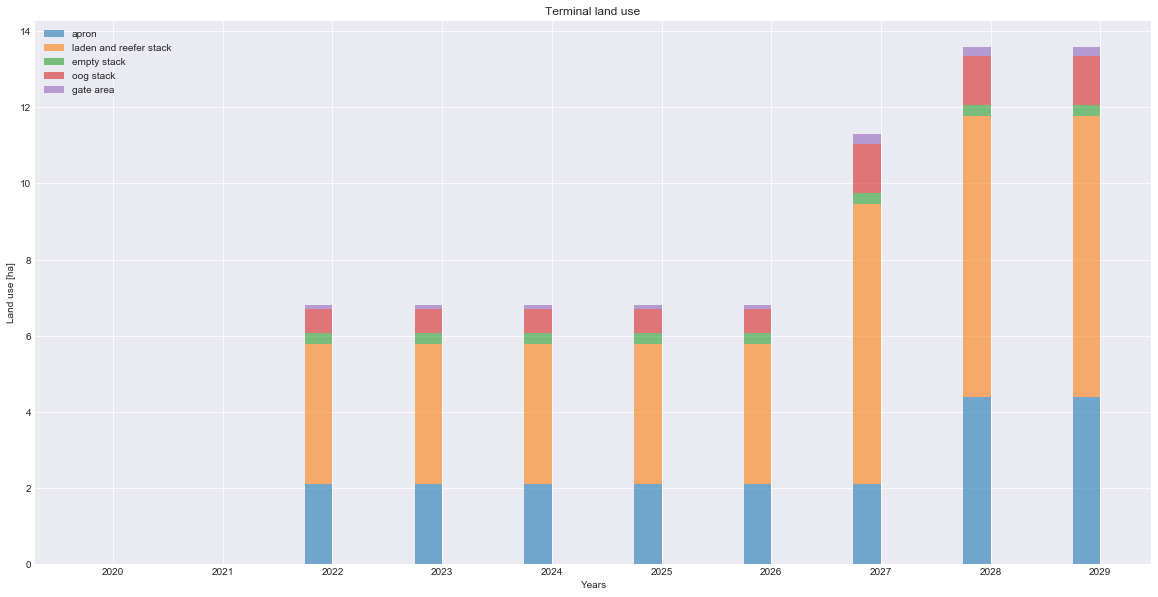

In [9]:
Terminal.land_use_plot()

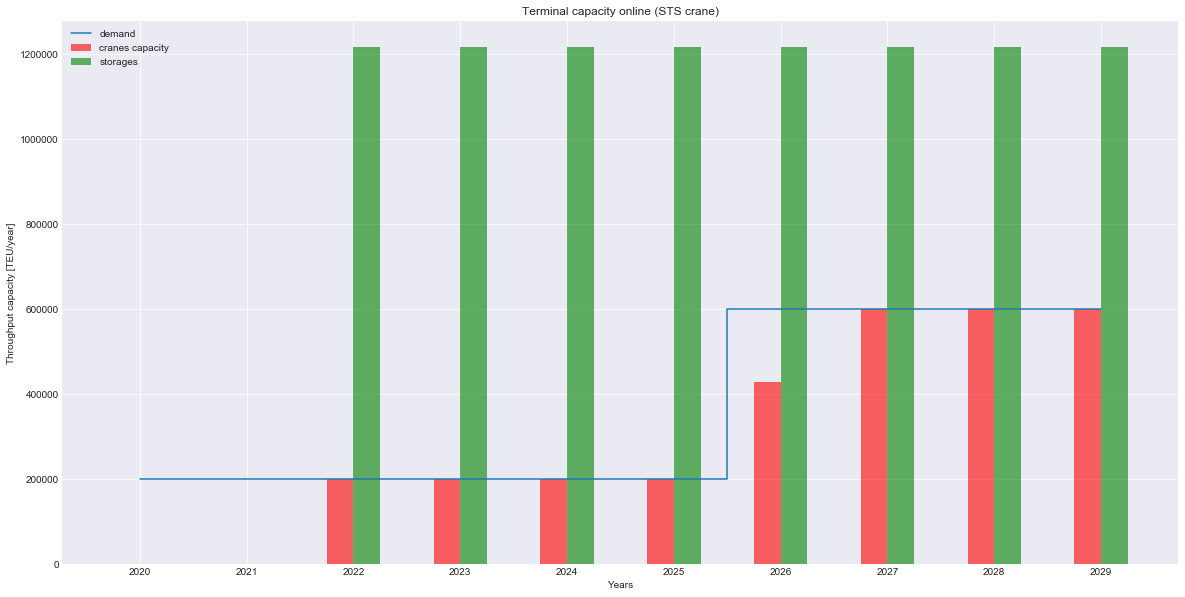

In [10]:
Terminal.terminal_capacity_plot()

In [11]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

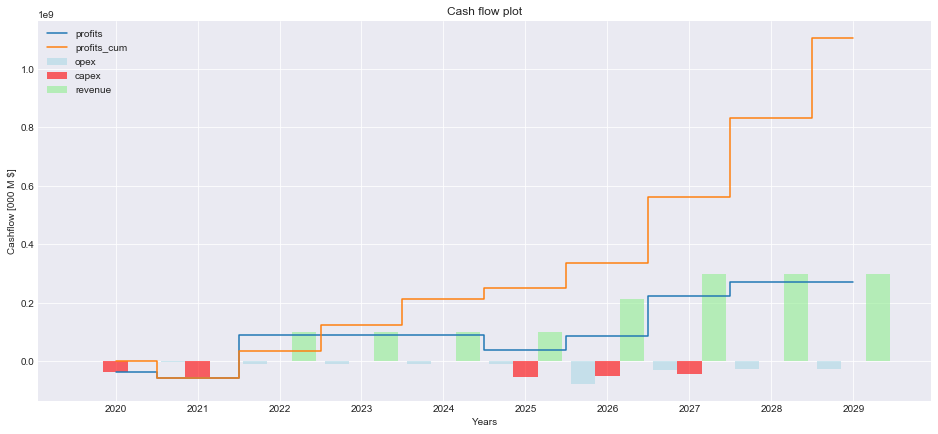

In [12]:
Terminal.cashflow_plot(cash_flows)

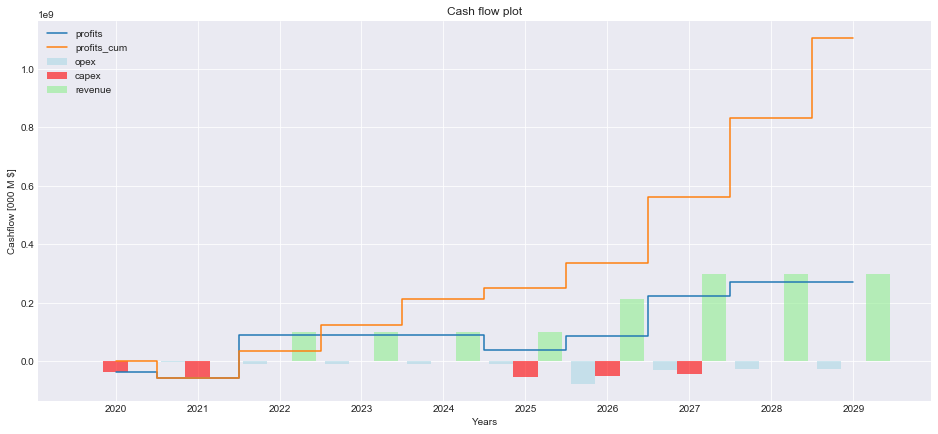

In [13]:

Terminal.cashflow_plot(cash_flows)

## SandBox

In [14]:
Terminal.NPV()

PV: [-3.55335840e+07 -4.91082777e+07  9.18352124e+07  9.28107016e+07
  9.36696440e+07  6.67564103e+07  1.54916171e+08  2.68705147e+08
  2.89994009e+08  2.91189476e+08]
NPV: 1265234909.2155914
